In [101]:
#k means 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer
from sklearn.cluster import KMeans
import math

In [17]:
df = pd.read_csv("lungvol.csv")

In [33]:
df.head()

,age,height,sex,IC
0,5,110.1,F,0.780
1,6,116.0,F,0.887
2,7,121.7,F,1.000
3,8,127.5,F,1.125
4,9,133.5,F,1.263


In [183]:
df.columns

Index(['age', 'height', 'sex', 'IC'], dtype='object')

<Axes: xlabel='IC', ylabel='Count'>

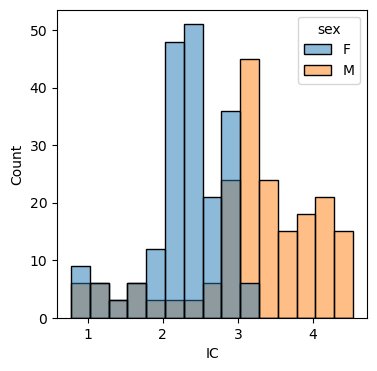

In [35]:
plt.figure(figsize=(4,4),dpi=100)
sns.histplot(data=df,x='IC',hue='sex')
#plt.xlim(0,2000)

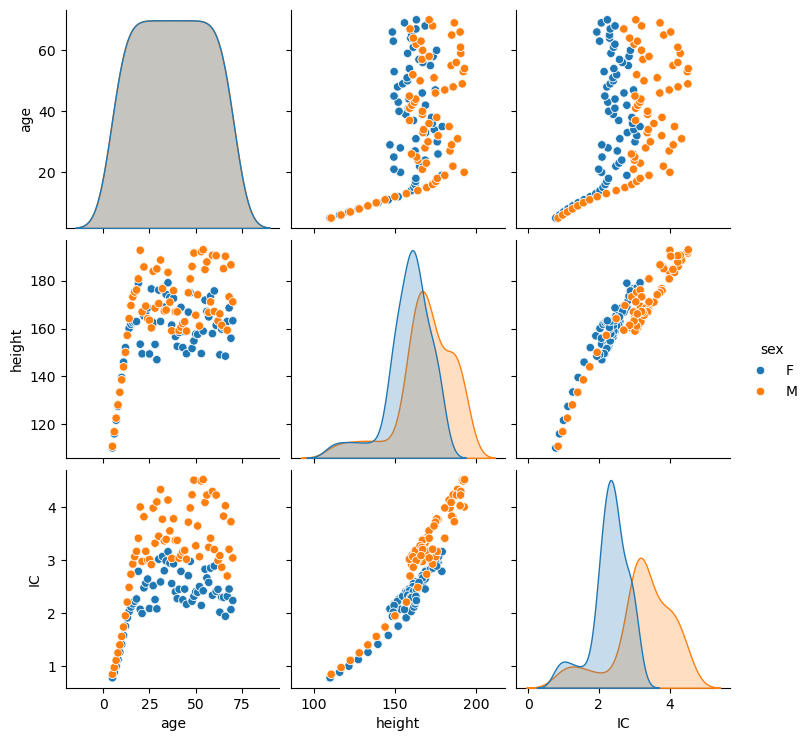

In [25]:
sns.pairplot(df,hue='sex')

In [68]:
X = pd.get_dummies(df)

In [70]:
scaler = StandardScaler()

In [72]:
scaled_X = scaler.fit_transform(X)

In [77]:
model = KMeans(n_clusters=2)

In [82]:
cluster_labels = model.fit_predict(scaled_X)

In [85]:
X['Cluster'] = cluster_labels

<Axes: >

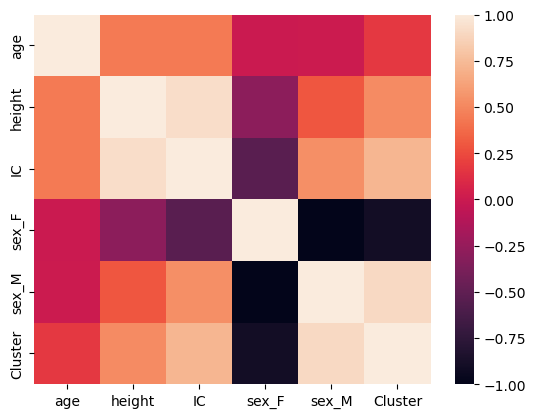

In [88]:
sns.heatmap(X.corr())

In [158]:
ssd = []
for k in range(2,10):    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X2)
    #sum of squared distances 
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

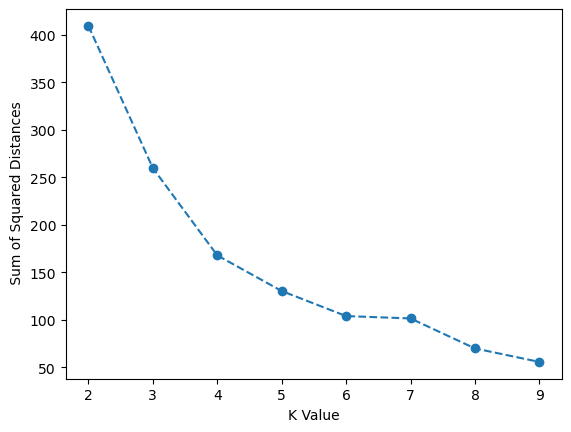

In [160]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [120]:
X.columns

Index(['age', 'height', 'IC', 'sex_F', 'sex_M', 'Cluster'], dtype='object')

In [154]:
X2=df[['age','IC']]
#scaled_X2

In [162]:
scaled_X2 = scaler.fit_transform(X2)

In [164]:
km = KMeans(n_clusters=6, random_state=0).fit(scaled_X2)
labels = km.labels_
centroids = km.cluster_centers_

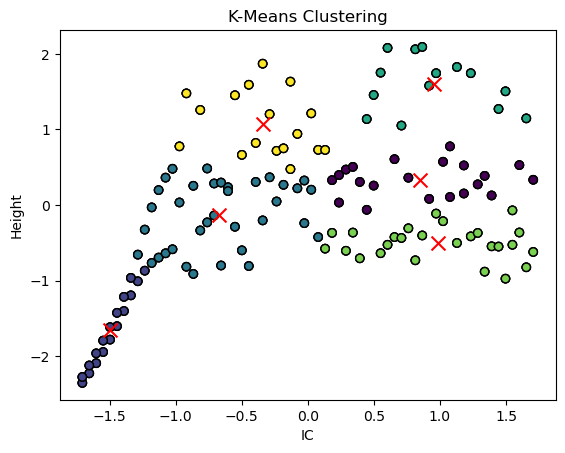

In [166]:
plt.scatter(scaled_X2[:, 0], scaled_X2[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title('K-Means Clustering')
plt.xlabel('IC')
plt.ylabel('Height')
plt.show()

In [39]:
#for k means discretization, calc bins 
def sturges_discrete(n):
    return math.ceil(math.log2(n) + 1)

def rice_discrete(n):
    return math.ceil(2 * (n ** (1 / 3)))

def scott_discrete(data):
    n = len(data)
    sigma = np.std(data)
    return math.ceil((max(data) - min(data)) / (3.5 * sigma * n ** (-1 / 3)))

def freedman_discrete(data):
    n = len(data)
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    return math.ceil((max(data) - min(data)) / (2 * iqr * n ** (-1 / 3)))

In [121]:
X2=df.drop(['sex'],axis=1)

In [123]:
y2=df['sex']

In [127]:
n_bins = rice_discrete(len(X2))

In [129]:
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
data_binned = discretizer.fit_transform(X2)

In [131]:
scaler = StandardScaler()

In [133]:
scaled_X2 = scaler.fit_transform(X2)

In [137]:
km = KMeans(n_clusters=6, random_state=0).fit(scaled_X2)
labels = km.labels_
centroids = km.cluster_centers_

In [155]:
data_clust = km.fit_predict(scaled_X2)

In [157]:
df2 = pd.DataFrame(scaled_X2, columns=[f'Feature_{i}' for i in range(scaled_X2.shape[1])])
df2['Cluster'] = data_clust


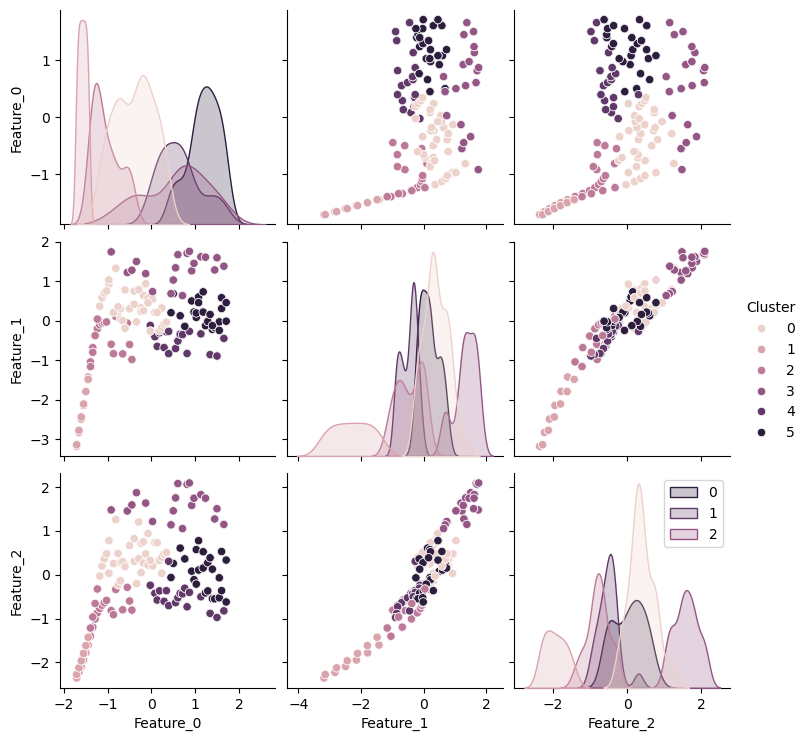

In [195]:
# Pair plot with hue as the cluster labels
sns.pairplot(df2, hue='Cluster', diag_kind='kde')
plt.legend(labels=plot_names)
plt.show()